# Simulating forced choice tasks in ExemPy

ExemPy is built to simulate the types of tasks that are often used in speech perception experiments. This allows us to more directly 

In ExemPy-Basics, we simulated an identifcation task, in which the "perceiver" provides a label from multiple options. This allowed us to produce a confusion matrix. 

Simulating a two-alternative forced choice (2AFC) task allows us to produce the type of plot often used to demonstrate categorical perception. 

In [1]:
%load_ext autoreload
from ExemPy import *
from ExemPy.utils import *
from ExemPy.viz import *
from ExemPy.GCM import *
%aimport ExemPy, ExemPy.utils, ExemPy.viz, ExemPy.GCM
%autoreload 1
import math
import random
import matplotlib.pyplot as plt
#%matplotlib inline
import numpy as np
import pandas as pd
from pandas import DataFrame
from scipy.optimize import minimize
import seaborn as sns
sns.set(style='ticks', context='paper')
colors=["#e3c934","#68c4bf","#c51000","#287271"]
sns.set_palette(colors)

## Set up data
- Read in Peterson and Barney 1952
- Convert Hz to Bark
- Preview pb52

In [2]:
pb52 = pd.read_csv('pb52_data//pb52.csv')
pb52 = HzToBark(pb52,["F0", "F1", "F2", "F3"])
pb52.sample(5)

,type,gender,speaker,vowel,repetition,F0,F1,F2,F3,z0,z1,z2,z3
134,m,m,7,FOOT,1,170,460,1120,2150,1.609765,4.566116,9.219091,13.494696
1451,c,f,73,PALM,2,280,1130,1400,3000,2.821250,9.274304,10.640833,15.685726
1494,c,m,75,FOOT,1,275,550,1420,3040,2.768770,5.344701,10.733373,15.770480
406,m,m,21,TRAP,1,138,620,1800,2440,1.233480,5.912713,12.304574,14.337364
656,m,m,33,GOOSE,1,160,320,960,2240,1.493396,3.232807,8.284247,13.768667


## Set parameters

In [3]:
dimsvals ={
    "z0": 1,
    "z1": 2.56,
    "z2": 1.985,
    "z3": 1.34 }
dimslist = list(dimsvals.keys())
catslist = ['type', 'vowel']           # man, woman, or child; lexical set notation
cval = 25

In [4]:
# Get average values for each type x vowel
###(Averages across speakers and repetitions)
datasumm = datasummary(pb52,catslist,dimslist)
print("Type 'w' formant averages (Bark) by vowel:")
datasumm[datasumm["type"]=="w"]

Type 'w' formant averages (Bark) by vowel:


,type,vowel,z0,z1,z2,z3
20,w,DRESS,2.173631,5.801199,14.028881,15.674275
21,w,FLEECE,2.292515,3.125540,15.191459,16.292670
22,w,FOOT,2.323410,4.636707,9.405672,14.947067
23,w,GOOSE,2.333479,3.794188,8.226731,14.899569
24,w,KIT,2.306120,4.386027,14.414048,15.809872
25,w,NURSE,2.165065,4.929947,11.648995,12.887087
26,w,PALM,2.078013,7.652141,9.785481,15.179671
27,w,STRUT,2.200470,6.936452,10.662141,15.151736
28,w,THOUGHT,2.133781,5.622050,7.966429,15.062146
29,w,TRAP,2.040201,7.632623,13.145777,15.300653


## Create interpolated continuum from 1 row to another

In [5]:
start = {"type" : "w", "vowel" : "FOOT"}      # Step 1
end = {"type" : "w", "vowel" : "STRUT"}         # Step n
terms = {"vowel" : ["FOOT", "STRUT"]}        # Two alternatives
steps = 7                                 # Number of steps in continuum

# Create continuum
cont = continuum(datasumm, start, end, dimslist, steps)
cont

,step,z0,z1,z2,z3
0,1,2.32341,4.636707,9.405672,14.947067
1,2,2.30292,5.019998,9.615083,14.981178
2,3,2.28243,5.403288,9.824495,15.015290
3,4,2.26194,5.786579,10.033906,15.049401
4,5,2.24145,6.169870,10.243318,15.083513
5,6,2.22096,6.553161,10.452729,15.117624
6,7,2.20047,6.936452,10.662141,15.151736


## Categorize continuum with respect to pb52 

In [6]:
stimuli = cont
excloud = pb52

choices_cont = multicat(stimuli, excloud, catslist, dimsvals, cval, exclude_self = True, N = 1, fc = terms)

In [7]:
choices_cont

,step,z0,z1,z2,z3,typeChoice,typeProb,vowelChoice,vowelProb
0,1,2.32341,4.636707,9.405672,14.947067,w,0.887427,FOOT,0.957679
1,2,2.30292,5.019998,9.615083,14.981178,w,0.900434,FOOT,0.953441
2,3,2.28243,5.403288,9.824495,15.015290,w,0.698651,FOOT,0.560801
3,4,2.26194,5.786579,10.033906,15.049401,m,0.467621,STRUT,0.583299
4,5,2.24145,6.169870,10.243318,15.083513,w,0.660126,STRUT,0.839797
5,6,2.22096,6.553161,10.452729,15.117624,w,0.949804,STRUT,0.970531
6,7,2.20047,6.936452,10.662141,15.151736,w,0.975598,STRUT,0.979452


Note (mostly to self) that at step 4, the midpoint of the continuum, the "perceiver" chooses the type man, rather than woman, for the first time. (Speaker type child is never 

This raises a similar question to my first qualifying paper experiment. Listeners heard re-synthesized whispers whose formants were interpolated between those of a woman and of a man. They then used something similar to method of adjustment for pitch to choose a resynthesized modal clip to correspond to the whisper.

The question was whether listeners would make a decision about gender and judge the whisper relative to that gender, or whether they would compare the raw formant values. I interpret the results as evidence that a subset of speakers do abstract to gender.

See poster<a href="https://drive.google.com/file/d/1HWUBFV7mKRTlNznLKIRgMdllvOZa_vYY/view?usp=sharing"> here. </a>

Resonance, as described in Johnson (2006) and Remirez & Johnson (2021) may be the mechanism behind this pattern. In a cyclical categorization process, early decisions about the stimulus re-enter the categorization loop. That is, a highly similar, and therefore highly activated, exemplar spreads its activation to neighboring exemplars. This has the effect of blurring differences across members of the same category. The differences between them matters less, and the perceiver becomes more and more confident in their choice. To think about this another way, if a perceiver thinks that an exemplar is a woman, the "women" exemplars would be able to contribute more activation than "child" and "man" exemplars.

Implementing resonance requires some ultimately arbitrary decisions about specific values and arithmetic operations. Should values be added or multiplied? How many cycles of categorization do they use? Is resonance binary, effectively an on/off switch (as in Johnson 2006, following Kruschke), or can it be gradient? 

### Categorical perception plot

The plot below shows the results of our simulated 2AFC identification task. On the X-axis is the continuum from FOOT (step 1) to STRUT (step 7). On the Y-axis is the probability of categorization as FOOT (rather than STRUT), which is taken as analagous to the proportion of FOOT responses in an experiment. 

A dotted line is printed at 0.5, or roughly chance. Above this line, "FOOT" is a more likely response than "STRUT". We can consider the point along the continuum at which the curve crosses this line as the boundary between "FOOT" and "STRUT".

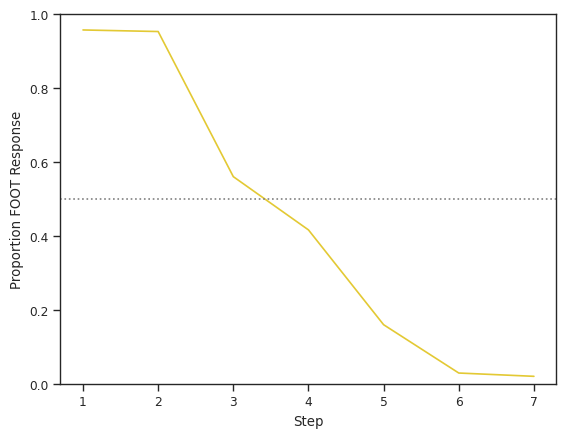

In [8]:
cpplot([choices_cont], "vowel", [""])

## Repeat this process with average man and child values

When presented with different stimuli, the curves differ in two ways:
- <b> Boundary. </b> 
    -- w, c: step 5
    -- m: step 4
- <b> Shape. </b>



In [9]:
continuum_is = {"vowel":["FOOT","STRUT"]}
grouping = {"type":["w","c","m"]}
data = pb52.copy()
steps = 7

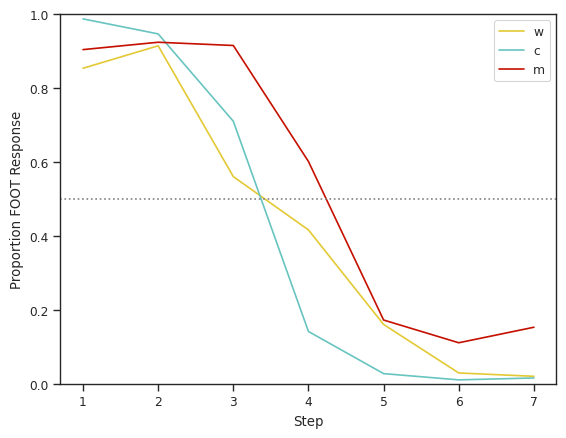

In [10]:
# unpack variables
contcat = list(continuum_is.keys())[0]
start = continuum_is[contcat][0]
end = continuum_is[contcat][1]
groupingcat = list(grouping.keys())[0]
labellist = grouping[groupingcat]

datsumm = datasummary(data, catslist, dimslist)
datalist = []

for l in labellist:
    # get start and end rows
    strt = {contcat : start, groupingcat : l}
    nd = {contcat : end, groupingcat : l}
    # make continuum
    cnt = continuum(datsumm, strt, nd, dimslist, steps = steps)
    # make choices
    chs = multicat(cnt, data, catslist, dimsvals, cval,
                  exclude_self = True, N = 1, fc = continuum_is)
    datalist.append(chs)

cpplot(datalist, contcat, labellist)

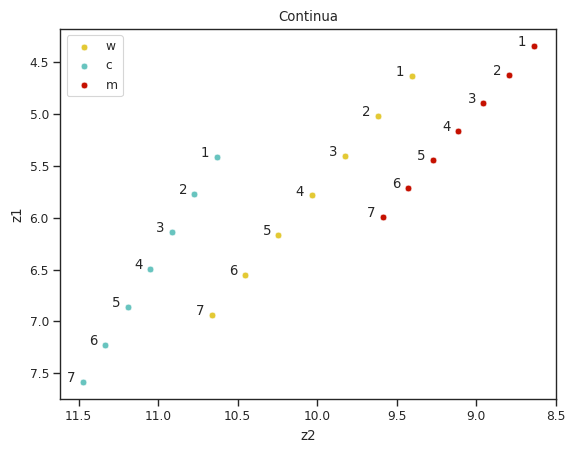

In [11]:
labix = 0
for d in datalist:
    lab = labellist[labix]
    pl = sns.scatterplot(x = 'z2', y = 'z1', data = d, label = lab)
    for line, row in d.iterrows():
        pl.text(d['z2'][line]+0.1, d['z1'][line], d['step'][line])
    labix += 1
pl.invert_yaxis()
pl.invert_xaxis()
plt.title("Continua")
plt.show()